In [1]:
from sklearn.linear_model import Perceptron

X = [[0,0],[0,1],[1,0],[1,1]]
y = [-1,1,1,1]

p = Perceptron()
p.fit(X,y)


print(p.coef_,p.intercept_)
print(p.predict(X))
print(p.score(X,y)*100)

[[2. 2.]] [-1.]
[-1  1  1  1]
100.0


In [8]:
from sklearn import  datasets
from sklearn.linear_model import  Perceptron
from sklearn.model_selection import  train_test_split
import numpy as np

digit=datasets.load_digits()

x_train,x_test,y_train,y_test = train_test_split(digit.data,digit.target,train_size=0.6)

p = Perceptron(max_iter = 100,eta0 = 0.001,verbose = 0)
p.fit(x_train,y_train)
res=p.predict(x_test)
sum(res==y_test)/len(res)

0.9276773296244785

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# MNIST 데이터 불러오기
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y)

# MLPClassifier 모델 초기화 및 학습
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=10, alpha=1e-4,
                    solver='adam', verbose=10, random_state=1)
mlp.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = mlp.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")


/Users/owo/anaconda3/envs/torchenv/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyboardInterrupt: 

In [ ]:
# 예측이 틀린 이미지 출력
incorrect_indices = np.where(y_pred != y_test)[0]

for idx in incorrect_indices:
    plt.figure()
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred[idx]}")
    plt.show()

In [5]:
def GPU():
    if torch.cuda.is_available() == True:
        device = 'cuda'
        templist = [1, 2, 3]
        templist = torch.FloatTensor(templist).to(device)
        print("Cuda torch working : ", end="")
        print(templist.is_cuda)
        print("current device no. : ", end="")
        print(torch.cuda.current_device())
        print("GPU device count : ", end="")
        print(torch.cuda.device_count())
        print("GPU name : ", end="")
        print(torch.cuda.get_device_name(0))
        print("device : ", device)
        # Execute the nvidia-smi command using subprocess
        try:
            output = subprocess.check_output(['nvidia-smi']).decode('utf-8')
            print("nvidia-smi output:")
            print(output)
        except (subprocess.CalledProcessError, FileNotFoundError) as e:
            print("Error executing nvidia-smi command:", str(e))
    elif torch.backends.mps.is_available() == True:
        print("Apple device detected\nActivating Apple Silicon GPU")
        device = torch.device("mps")
    else:
        print("cant use gpu , activating cpu")
        device = 'cpu'

    return device

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
if torch.backends.mps.is_available() == True:
    print("Apple device detected\nActivating Apple Silicon GPU")
    device = torch.device("mps")
else:
    device = 'cpu'
print("current device : ",device)
print(device)

# MNIST 데이터 불러오기
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Apple device detected
Activating Apple Silicon GPU
current device :  mps
mps


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Original MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model with One Hidden Layer (3200 neurons)
class MLP1Layer(nn.Module):
    def __init__(self):
        super(MLP1Layer, self).__init__()
        self.fc1 = nn.Linear(28*28, 3200)
        self.fc2 = nn.Linear(3200, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model with Ten Hidden Layers
class MLP10Layers(nn.Module):
    def __init__(self):
        super(MLP10Layers, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        # Define additional hidden layers
        self.hidden_layers = nn.ModuleList([nn.Linear(512, 512) for _ in range(9)])
        self.fc_last = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        for layer in self.hidden_layers:
            x = F.relu(layer(x))
        x = self.fc_last(x)
        return x


In [11]:
models = [MLP().to(device),MLP1Layer().to(device),MLP10Layers().to(device)] # all
models = [MLP1Layer().to(device)] # one

for m in models:
    model = m
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    for epoch in range(10):  # 에포크 설정
        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)
            
            # 순전파
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # 역전파 및 최적화
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    print(f"model : {m} Epoch {epoch+1}, Loss: {loss.item()}")

model : MLP1Layer(
  (fc1): Linear(in_features=784, out_features=3200, bias=True)
  (fc2): Linear(in_features=3200, out_features=10, bias=True)
) Epoch 10, Loss: 0.04593837633728981


Accuracy: 95.35%
Overall F1 Score: 0.9530125592953158


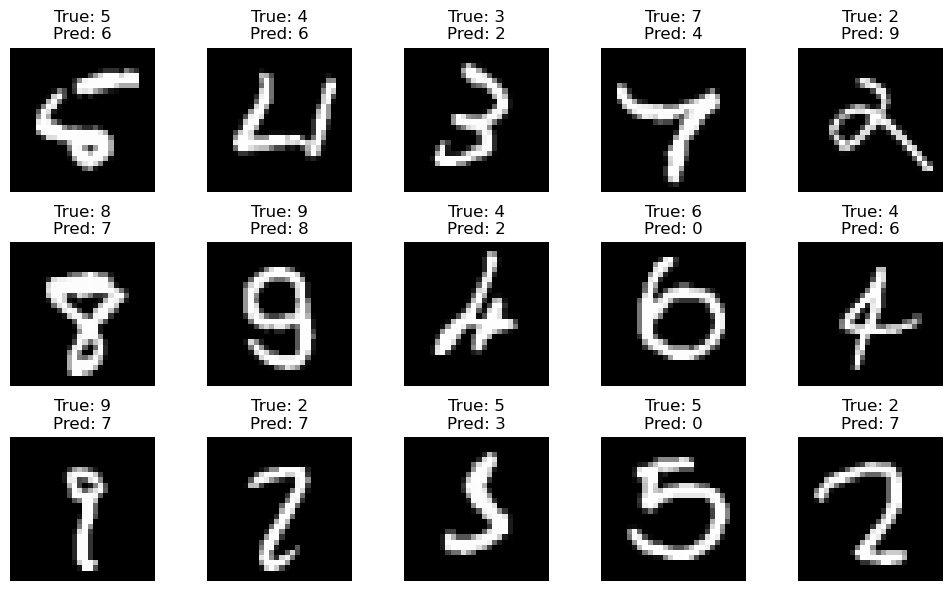

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch



true_positives = np.zeros(10)
false_positives = np.zeros(10)
false_negatives = np.zeros(10)

misclassified_images = []
misclassified_labels = []
misclassified_preds = []

model.eval()  
total_samples = 0
correct_predictions = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        misclassified = predicted != labels
        for image, label, pred in zip(images[misclassified], labels[misclassified], predicted[misclassified]):
            if len(misclassified_images) < 15:
                misclassified_images.append(image.cpu())
                misclassified_labels.append(label.cpu())
                misclassified_preds.append(pred.cpu())
        
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        for i in range(10): 
            true_positives[i] += ((predicted == labels) & (labels == i)).sum().item()
            false_positives[i] += ((predicted != labels) & (predicted == i)).sum().item()
            false_negatives[i] += ((predicted != labels) & (labels == i)).sum().item()

precision = np.divide(true_positives, true_positives + false_positives, out=np.zeros_like(true_positives), where=true_positives + false_positives != 0)
recall = np.divide(true_positives, true_positives + false_negatives, out=np.zeros_like(true_positives), where=true_positives + false_negatives != 0)
f1_scores = 2 * (precision * recall) / (precision + recall)

f1_scores = np.nan_to_num(f1_scores)

overall_f1 = np.mean(f1_scores)

accuracy = 100 * correct_predictions / total_samples
print(f"Accuracy: {accuracy:.2f}%")
print(f"Overall F1 Score: {overall_f1}")

# 이미지 출력
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(misclassified_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {misclassified_labels[i].item()}\nPred: {misclassified_preds[i].item()}')
    plt.axis('off')
plt.tight_layout()
plt.show()